In [2]:
#Importing dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#reading file into a dataframe
file = "clean_data.csv"
df = pd.read_csv(file)
df.columns

Index(['API', 'Longitude', 'Latitude', 'Well Type', 'Operator',
       'Operator (Original)', 'Sub-play', 'County', 'First Production Date',
       'Vertical Depth (m)', 'Measured Depth (m)', 'Lateral Length (m)',
       'Drilling Days (days)', 'Drilling Speed (m/day)', 'Proppant (kg)',
       'API Gravity (degree)', 'Well Cost Total (US$)', 'Rig Cost (US$)',
       'Casing Cost (US$)', 'Water Cost (US$)', 'Proppant Cost (US$)',
       'Pumping Cost (US$)', 'Other Cost (US$)', 'Cum180 Oil (bbl)',
       'Cum365 Oil (bbl)', 'Cum180 Gas (mcf)', 'Cum365 Gas (mcf)',
       'Cum365 Total (boe)', 'IP Oil (b/d)', 'IP Gas (mmcfd)',
       'IP Total (boe/d)', 'EUR Oil (mmbbl)', 'EUR Gas (bcf)',
       'EUR Total (mmboe)'],
      dtype='object')

In [4]:
#Overview of Eagle Ford Play
summary = df.groupby(['Sub-play'])['Operator', "API"].nunique()
summary = summary.rename(columns = {"API": "Well count", "Operator": "Operator Count"})
summary

,Operator Count,Well count
Sub-play,,
Black Oil,76,4167
Edwards Condensate,24,2939
Hawkville Condensate,29,2690
Karnes Trough,30,3644
Maverick Condensate,21,3115
Maverick Oil,17,146
Northeast Oil,21,404
Other Eagle Ford,11,33
Southeast Gas,5,45


In [5]:
#Overview of Eagle Ford Play

#Calculating summary statistics for each sub-play

agg = {
    'Well Cost Total (US$)': {'Avg Well cost': 'mean'}, 
    'Rig Cost (US$)': {'Avg Rig Cost (US$)':'mean'}, 
    'EUR Total (mmboe)':{'Avg EUR (mmboe)': 'mean'},
    'Cum365 Gas (mcf)': {'Avg Cum365 Gas (mcf)': 'mean', 'Max Cum365 Gas (mcf)': max},
    'Cum365 Oil (bbl)': {'Avg Cum365 Oil (bbl)': 'mean', 'Max Cum365 Oil (bbl)': max}

}


summary_1 = df.groupby(['Sub-play']).agg(agg)
summary_1.columns = summary_1.columns.droplevel()
summary_1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,Avg Well cost,Avg Rig Cost (US$),Avg EUR (mmboe),Avg Cum365 Gas (mcf),Max Cum365 Gas (mcf),Avg Cum365 Oil (bbl),Max Cum365 Oil (bbl)
Sub-play,,,,,,,
Black Oil,6.616557e+06,571394.653952,0.303541,71959.004440,631180.0,71987.674589,457540.0
Edwards Condensate,7.352757e+06,787762.745528,0.528737,491961.127064,5670010.0,102136.813352,954071.0
Hawkville Condensate,7.286108e+06,684179.590484,0.378131,234708.285273,3355674.0,62014.647468,481699.0
Karnes Trough,7.205512e+06,649498.131925,0.437968,164809.770368,2157301.0,113501.175123,915021.0
Maverick Condensate,6.653161e+06,679298.460690,0.616124,538671.729564,3743322.0,47548.895095,522446.0
Maverick Oil,6.445103e+06,517461.491525,0.182250,45906.956835,313667.0,30959.719424,147557.0
Northeast Oil,7.574177e+06,734220.834437,0.220791,61836.686649,924010.0,44678.446866,181615.0
Other Eagle Ford,7.049492e+06,669419.900026,0.160435,28213.848485,193871.0,39411.545455,94201.0
Southeast Gas,7.884221e+06,972062.909091,0.623721,985148.333333,2457807.0,5387.577778,26339.0


In [6]:
#Merging two dataframs into one to get an overview of Eagle Ford Play by Sub-play:
summary_final  = pd.merge(summary, summary_1, left_index=True, right_index=True)
summary_final

,Operator Count,Well count,Avg Well cost,Avg Rig Cost (US$),Avg EUR (mmboe),Avg Cum365 Gas (mcf),Max Cum365 Gas (mcf),Avg Cum365 Oil (bbl),Max Cum365 Oil (bbl)
Sub-play,,,,,,,,,
Black Oil,76,4167,6.616557e+06,571394.653952,0.303541,71959.004440,631180.0,71987.674589,457540.0
Edwards Condensate,24,2939,7.352757e+06,787762.745528,0.528737,491961.127064,5670010.0,102136.813352,954071.0
Hawkville Condensate,29,2690,7.286108e+06,684179.590484,0.378131,234708.285273,3355674.0,62014.647468,481699.0
Karnes Trough,30,3644,7.205512e+06,649498.131925,0.437968,164809.770368,2157301.0,113501.175123,915021.0
Maverick Condensate,21,3115,6.653161e+06,679298.460690,0.616124,538671.729564,3743322.0,47548.895095,522446.0
Maverick Oil,17,146,6.445103e+06,517461.491525,0.182250,45906.956835,313667.0,30959.719424,147557.0
Northeast Oil,21,404,7.574177e+06,734220.834437,0.220791,61836.686649,924010.0,44678.446866,181615.0
Other Eagle Ford,11,33,7.049492e+06,669419.900026,0.160435,28213.848485,193871.0,39411.545455,94201.0
Southeast Gas,5,45,7.884221e+06,972062.909091,0.623721,985148.333333,2457807.0,5387.577778,26339.0


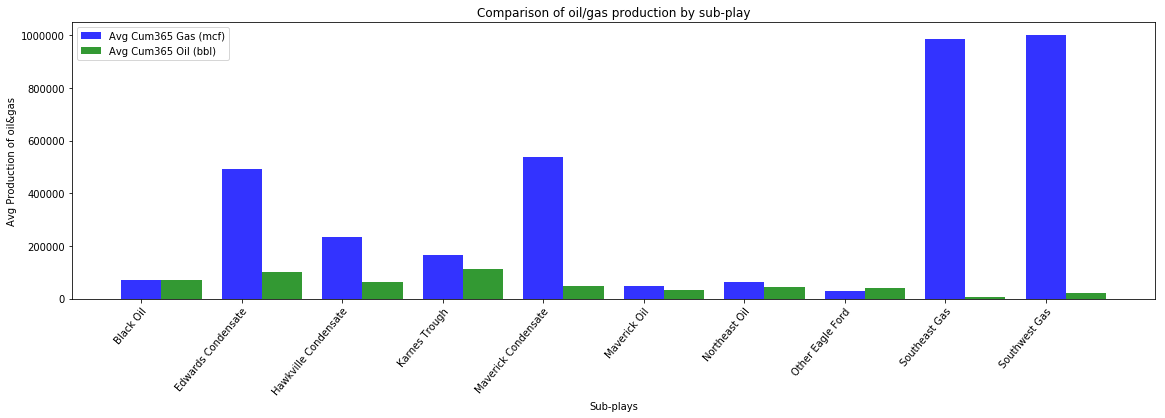

In [7]:
# data to plot
n_groups = 10
sub_plays = summary_final.index[0:10]


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.8
 
rects1 = plt.bar(index, summary_final['Avg Cum365 Gas (mcf)'], bar_width, alpha=opacity,
                 color='b', align='center',
                 label='Avg Cum365 Gas (mcf)')
 
rects2 = plt.bar(index + bar_width, summary_final['Avg Cum365 Oil (bbl)'] , bar_width,
                 alpha=opacity,
                 color='g',
                 label='Avg Cum365 Oil (bbl)', 
                 align='center')
 
plt.xlabel('Sub-plays')
plt.ylabel('Avg Production of oil&gas')
plt.title('Comparison of oil/gas production by sub-play')
plt.xticks(index, sub_plays, rotation=50, rotation_mode="anchor", horizontalalignment="right")

plt.legend(loc=2)
 
plt.tight_layout()
fig.set_size_inches(19,8)
plt.show()

In [8]:
#Summary for top 5 operators

operator_summary = df.groupby(['Operator']).mean()
operator_summary = operator_summary.sort_values(ascending=False, by = 'EUR Total (mmboe)')[:5]
operator_summary.columns

operator_summary = operator_summary.drop(columns = ['API', 'Longitude', 'Latitude','Drilling Days (days)', 'Drilling Speed (m/day)', 
                                                    'Cum365 Oil (bbl)', 'Cum365 Gas (mcf)',
                                                    'Cum365 Total (boe)', 'IP Oil (b/d)', 'IP Gas (mmcfd)',
                                                    'IP Total (boe/d)', 'EUR Oil (mmbbl)', 'EUR Gas (bcf)'])

operator_summary


,Vertical Depth (m),Measured Depth (m),Lateral Length (m),Proppant (kg),API Gravity (degree),Well Cost Total (US$),Rig Cost (US$),Casing Cost (US$),Water Cost (US$),Proppant Cost (US$),Pumping Cost (US$),Other Cost (US$),Cum180 Oil (bbl),Cum180 Gas (mcf),EUR Total (mmboe)
Operator,,,,,,,,,,,,,,,
Fasken Oil & Ranch,2609.214286,4781.000000,2021.428571,2.911007e+06,61.338804,7.280984e+06,6.761295e+05,238248.642857,730473.071429,2.864281e+05,1.239452e+06,4.110253e+06,40430.071429,479463.857143,2.488815
Escondido Resources,3171.536523,5631.252320,2341.677125,3.813755e+06,56.026815,8.789593e+06,6.940579e+05,277944.123188,833444.083287,6.227185e+05,2.415794e+06,3.945634e+06,2199.921876,952098.329384,0.867171
SM Energy,2509.643160,4460.552384,1853.049968,4.329512e+06,57.477582,6.795592e+06,5.990429e+05,250747.022937,763129.477309,1.049112e+06,1.387750e+06,2.745811e+06,16004.157441,587998.964059,0.770743
Noble Energy,2549.305695,4384.611115,1749.101562,3.174483e+06,58.316427,6.152214e+06,5.689929e+05,248684.730122,632499.915684,7.893246e+05,8.368382e+05,3.075873e+06,37270.693037,649983.347962,0.729761
Repsol,3435.816109,5164.821918,1690.990868,2.644288e+06,56.434375,9.237435e+06,1.230930e+06,417570.000000,425135.000000,4.033840e+05,1.451181e+06,5.309236e+06,30173.657817,338184.421091,0.724411


In [19]:
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import numpy as np
import numpy as np
import matplotlib

lats = list(df['Latitude'])
lons = list(df['Longitude'])
sPlay = list(df['Sub-play'])



In [21]:
# setting parameters for title and axes
font = {'family' : 'verdana',
        'size'   : 12}
matplotlib.rc('font', **font)

# # Grabbing the data
# lats,lons,names,altitude = [],[],[],[]
# temp_dat = []
# with open('asos_stations.csv') as csvfile:
#     reader = csv.DictReader(csvfile,delimiter=',')
#     for data in reader:
#         if float(data['UTC'])>-5. or float(data['UTC'])<-8. or float(data['ELEV'])<0.0:
#             continue
#         names.append('K'+data['CALL'])
#         lats.append(float(data['LAT']))
#         lons.append(float(data['LON']))
#         altitude.append(float(data['ELEV']))
        
# How much to zoom from coordinates (in degrees)
zoom_scale = 8

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
        np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

fig, ax = plt.subplots(figsize=(15,9))
plt.title("Eagle Ford Wells Per Sub-play")
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.drawstates()
m.shadedrelief()

for i in range(len(lons)):
    x,y = m(float(lons[i]), float(lats[i]))
    m.plot(x, y, marker = 'o', c='r', markersize=0.5, alpha=0.5, latlon=False)    

# # # format colors for elevation range
# # alt_min = np.min(altitude)
# # alt_max = np.max(altitude)
# cmap = plt.get_cmap('gist_earth')
# normalize = matplotlib.colors.Normalize(vmin=alt_min, vmax=alt_max)

# # plot elevations with different colors using the numpy interpolation mapping tool
# # the range [50,200] can be changed to create different colors and ranges
# # for ii in range(0,len(altitude)):
#x,y = m(lons[ii],lats[ii])
#color_interp = np.interp(altitude[ii],[alt_min,alt_max],[50,200])
#plt.plot(x,y,3,marker='o',color=cmap(int(color_interp)))

# # format the colorbar 
# cax, _ = matplotlib.colorbar.make_axes(ax)
# cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap,norm=normalize,label='Elevation')

# save the figure and show it
plt.savefig('EagleFordWells.png', format='png', cmap='afmhot', dpi=96, transparent=True)
plt.show()

ValueError: Invalid RGBA argument: 'Black Oil'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001975A16A0D0> (for post_execute):


ValueError: Invalid RGBA argument: 'Black Oil'

ValueError: Invalid RGBA argument: 'Black Oil'

<Figure size 1080x648 with 1 Axes>

In [11]:
print(zip)

<class 'zip'>


In [ ]:
zip.head